## Visualization of the simulation of multi TODs and the results of the sampling

In [1]:
import numpy as np
import pickle, os
import matplotlib.pyplot as plt

In [17]:
# Save the "local_TOD" objects
savepath = "/Users/zzhang/Dataspace/flicker/"
# savepath = "/Users/user/TOD_simulations/"
TOD_savename = "TOD_sim_1.pkl"
# combind the savepath and savename
TOD_savepath = os.path.join(savepath, TOD_savename)

# If TOD_savepath exists, directly read it
if os.path.exists(TOD_savepath):
    with open(TOD_savepath, 'rb') as f:
        local_TOD = pickle.load(f)
true_Tsky = local_TOD.Tsky

In [18]:
num_pixels = len(true_Tsky)
pixel_indices = local_TOD.pixel_indices

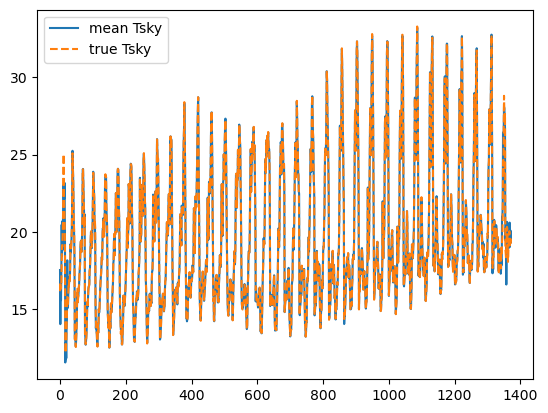

In [4]:
Tsys_samples = np.load('sim3_multi_results/Tsys_samples_v2.npy')
Tsky_samples = Tsys_samples[:, :num_pixels]
Tmean = np.mean(Tsky_samples, axis=0)
Tstd = np.std(Tsky_samples, axis=0)

# plot the mean with error bars
# plt.errorbar(range(len(Tmean)), Tmean, yerr=Tstd, fmt='o', label='mean Tsky')
plt.plot(range(len(Tmean)), Tmean, label='mean Tsky')
plt.plot(range(len(Tmean)), true_Tsky, label='true Tsky', linestyle='--')
#plt.ylim(5, 15)
plt.legend()


In [5]:
# Show the healpix maps
import healpy as hp
# Define HEALPix resolution
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)  

true_map = np.zeros(NPIX, dtype=float)
sample_mean_map = np.zeros(NPIX, dtype=float)
sample_std_map = np.zeros(NPIX, dtype=float)

true_map[pixel_indices] = true_Tsky
sample_mean_map[pixel_indices] = Tmean
sample_std_map[pixel_indices] = Tstd


In [6]:
def view_patch_map(map, pixel_indices):
    # Create a new map with just the patch (other pixels set to UNSEEN)
    patch_only_map = np.full(len(map), hp.UNSEEN)
    patch_only_map[pixel_indices] = map[pixel_indices]
    return patch_only_map



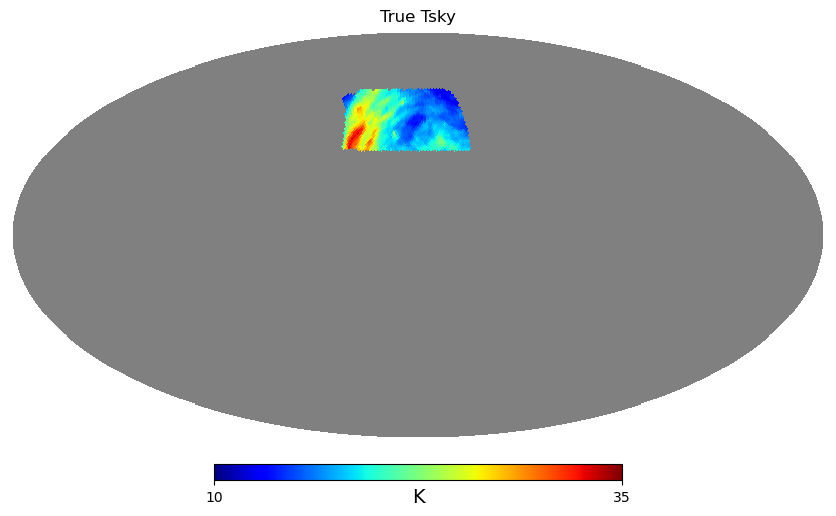

In [ ]:
# # healpy view the true_map and sample_mean_map using the saved colorbar
# patch_true_map = view_patch_map(true_map, pixel_indices)
# hp.mollview(patch_true_map, title="True Tsky", unit="K", cmap='jet', min=10, max=35)
# #plt.savefig("true_map_multi_TOD.pdf")

In [ ]:
# patch_mean_map = view_patch_map(sample_mean_map, pixel_indices)
# hp.mollview(patch_mean_map, title="Estimated Tsky (mean of samples)", unit="K", cmap='jet', min=10, max=30)
# hp.cartview(patch_mean_map, title="Estimated Tsky (Cartesian)", unit="K", cmap='jet', min=10, max=30)
# plt.savefig("est_map_multi_TOD.pdf")

In [ ]:
# Get pixel coordinates
theta, phi = hp.pix2ang(NSIDE, pixel_indices)
lon, lat = np.degrees(phi), 90 - np.degrees(theta)
lon_center, lat_center = np.median(lon)-25, np.median(lat)


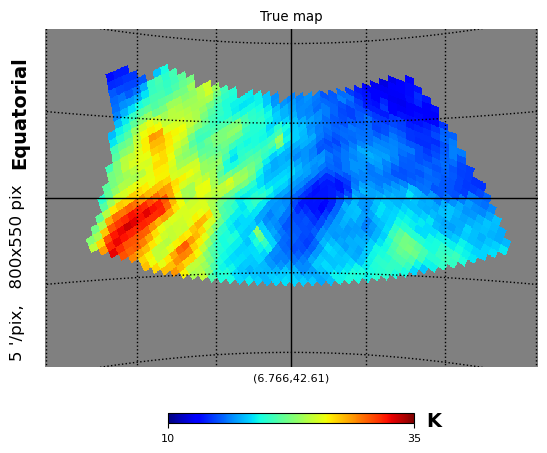

In [74]:
patch_true_map = view_patch_map(true_map, pixel_indices)

hp.gnomview(patch_true_map, rot=(lon_center, lat_center), 
           xsize=800, ysize=550, reso=res, title="True map", 
           unit="K", cmap='jet', min=10, max=35,
           #notext=True,
           coord=['C'], 
           cbar=True, notext=False, badcolor='gray')
#plt.grid(True)
hp.graticule(dpar=10, dmer=10, coord=['C'], local=True)  
#plt.grid(color='gray', linestyle=':', alpha=0.5)  # Custom grid style
plt.gca().set_facecolor('white')  # Set background to white
plt.savefig("sim3_multi_results/true_map_multi_TOD.pdf")

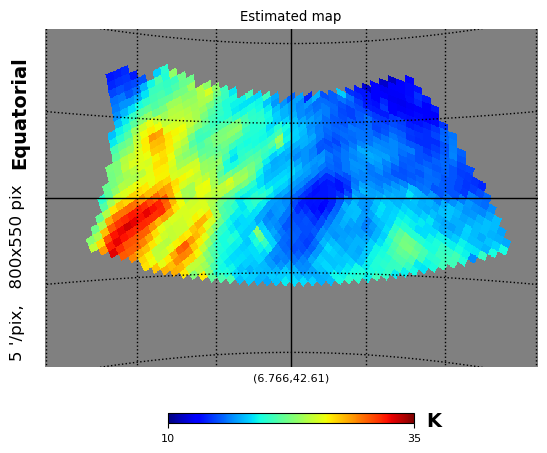

In [75]:
patch_mean_map = view_patch_map(sample_mean_map, pixel_indices)

hp.gnomview(patch_mean_map, rot=(lon_center, lat_center), 
           xsize=800, ysize=550, reso=res, title="Estimated map", 
           unit="K", cmap='jet', min=10, max=35,
           #notext=True,
           coord=['C'], 
           cbar=True, notext=False, badcolor='gray')
#plt.grid(True)
hp.graticule(dpar=10, dmer=10, coord=['C'], local=True)  
#plt.grid(color='gray', linestyle=':', alpha=0.5)  # Custom grid style
plt.gca().set_facecolor('white')  # Set background to white
plt.savefig("sim3_multi_results/est_map_multi_TOD.pdf")

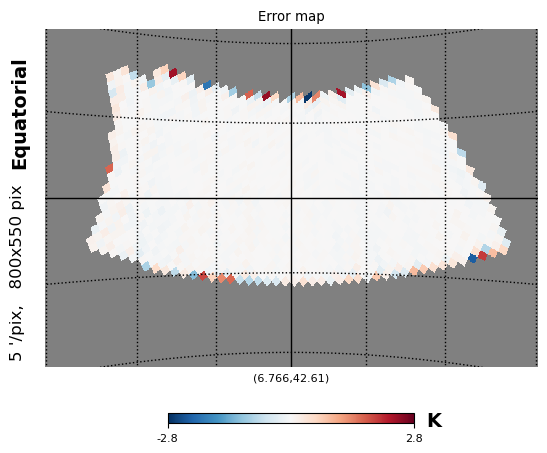

In [76]:
patch_error_map = view_patch_map(sample_mean_map-true_map, pixel_indices)

hp.gnomview(patch_error_map, rot=(lon_center, lat_center), 
           xsize=800, ysize=550, reso=res, title="Error map", 
           unit="K", cmap='RdBu_r', min=-2.8, max=2.8,
           #notext=True,
           coord=['C'], 
           cbar=True, notext=False,
           badcolor='gray')
#plt.grid(True)
hp.graticule(dpar=10, dmer=10, coord=['C'], local=True)  
#plt.grid(color='gray', linestyle=':', alpha=0.5)  # Custom grid style
plt.gca().set_facecolor('white')  # Set background to white
plt.savefig("sim3_multi_results/error_map_multi_TOD.pdf")

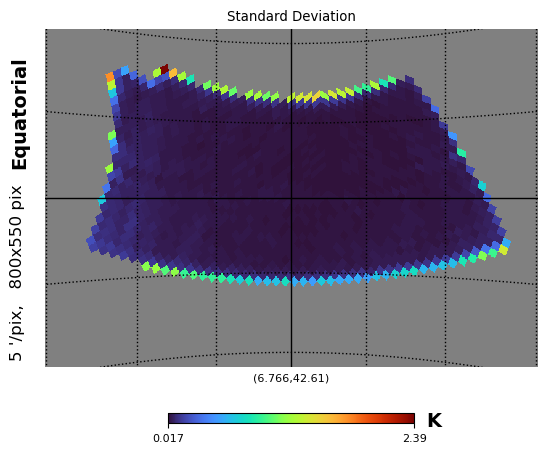

In [77]:
from tabnanny import verbose


patch_std_map = view_patch_map(sample_std_map, pixel_indices)

hp.gnomview(patch_std_map, rot=(lon_center, lat_center), 
           xsize=800, ysize=550, reso=res, title="Standard Deviation", 
           unit="K", cmap='turbo', #min=10, max=35,
           #notext=True,
           coord=['C'], #norm='log',
           cbar=True, notext=False, badcolor='gray')
#plt.grid(True)
# Get current image and customize colorbar
# im = plt.gca().get_images()[0]
# cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
# cbar.set_ticks([0.2, 0.6, 1.0, 1.5, 2.0])  # Manual tick positions
# cbar.set_ticklabels(["0.2", "0.6", "1.0", "1.5", "2,0"])  # Explicit labels

hp.graticule(dpar=10, dmer=10, coord=['C'], local=True, 
            # label=True,  # Enable labels
            # verbose=True,
            #label_top='L',  # Show longitude labels at top
            #label_right='B',  # Show latitude labels at right
            #label_color='black',  # Ensure visibility
            #label_size=10
            )  
# Add this after graticule call to force label visibility
plt.rcParams.update({
    'font.size': 8,
    'text.color': 'black',
    'axes.labelcolor': 'black'
})

plt.gca().set_facecolor('white')  # Set background to white
plt.savefig('sim3_multi_results/std_map_multi_TOD.pdf')

In [52]:
# patch_std_map = view_patch_map(sample_std_map, pixel_indices)
# hp.mollview(patch_std_map, title='Standard Variance', unit='K', cmap='plasma', norm='log')
# plt.savefig('std_map_multi_TOD.pdf')

# Test Tsky sampler